See the first version of this notebook [here](https://github.com/rajewsky-lab/planarian_lineages/blob/1741fc376574393980b7976b764ccdd536615150/graph_abstraction/epidermal-lineage.ipynb).

# Planaria lineages: the epidermal lineage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.0.3 anndata==0.5.8+3.gf10296c numpy==1.14.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata_full = sc.read('./data/dge.txt', cache=True).T

... writing an h5ad cache file to speedup reading next time


In [3]:
sc.pp.log1p(adata_full)

## Pseudotime series

Let us use some marker genes for clusters obtained using Seurat.

In [3]:
markers = pd.read_csv('./data/epidermal_lineage.top10.markers.txt', sep='\t')
epidermal_markers = markers['gene'].values

In [4]:
adata = sc.read('./write/planaria.h5ad')

In [5]:
adata_full.obs = adata.obs
adata_full.uns['clusters_colors'] = adata.uns['clusters_colors']

In [6]:
path_1 = ['neoblast 1',
          'epidermal neoblasts', 'early epidermal progenitors',
          'late epidermal progenitors 1',
          'late epidermal progenitors 2', 'epidermis']

There is significant overlap in all stages of the epidermal lineage except for the last - the transition to the epidermis cluster seems disconnected.

Only the following markers seem to be connecting the late epidermal progenitors with the epidermis:     'dd_Smed_v6_80_0', 'dd_Smed_v6_146_0', 'dd_Smed_v6_2178_0', 'dd_Smed_v6_18_0'

This heatmap looks slightly different than in the supplemental material - the final dge matrix uploaded to the shiny app differs slightly. However, the same progressions and trends are evident.

saving figure to file ./figures/paga_path_epidermal.png


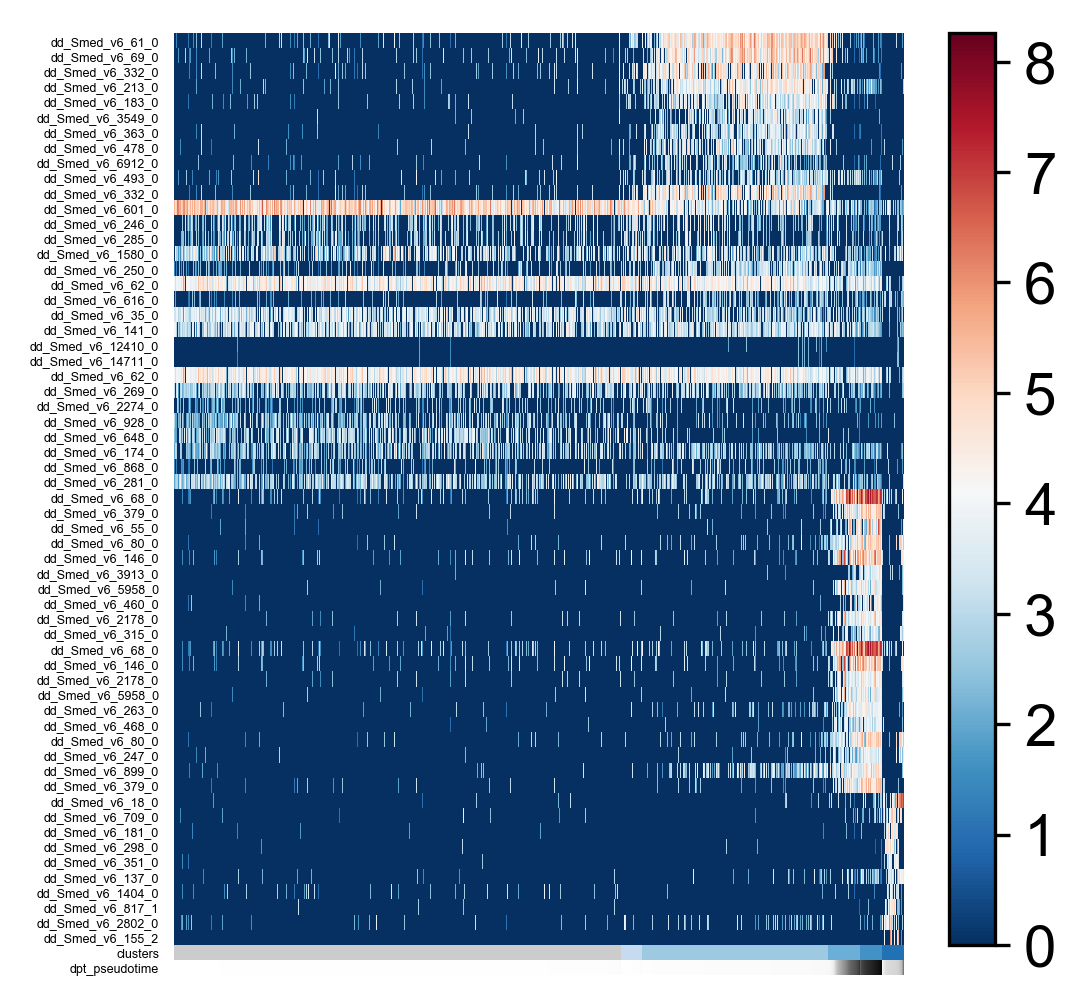

In [7]:
sc.pl.paga_path(adata_full, path_1, epidermal_markers, groups_key='clusters', show_node_names=False, ytick_fontsize=3, save='_epidermal')

## PAGA

In [8]:
epidermal_markers = np.unique(epidermal_markers)

In [9]:
adata_epidermal = adata_full[:, epidermal_markers]

In [10]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 21612 × 52 
    obs: 'clusters', 'dpt_pseudotime'
    uns: 'clusters_colors'

In [11]:
epidermal_clusters = [
    'epidermal neoblasts',
    'early epidermal progenitors',
    'late epidermal progenitors 1',
    'late epidermal progenitors 2', 'epidermis']

In [12]:
adata_epidermal = adata_epidermal[
    adata_full.obs['clusters'].isin(
        epidermal_clusters)]

Now, we're left with only 4009 cells.

In [13]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 4009 × 52 
    obs: 'clusters', 'dpt_pseudotime'
    uns: 'clusters_colors'

In [14]:
sc.tl.tsne(adata_epidermal, n_pcs=0)

computing tSNE
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:11.49)


In [15]:
sc.settings.set_figure_params(dpi=80)

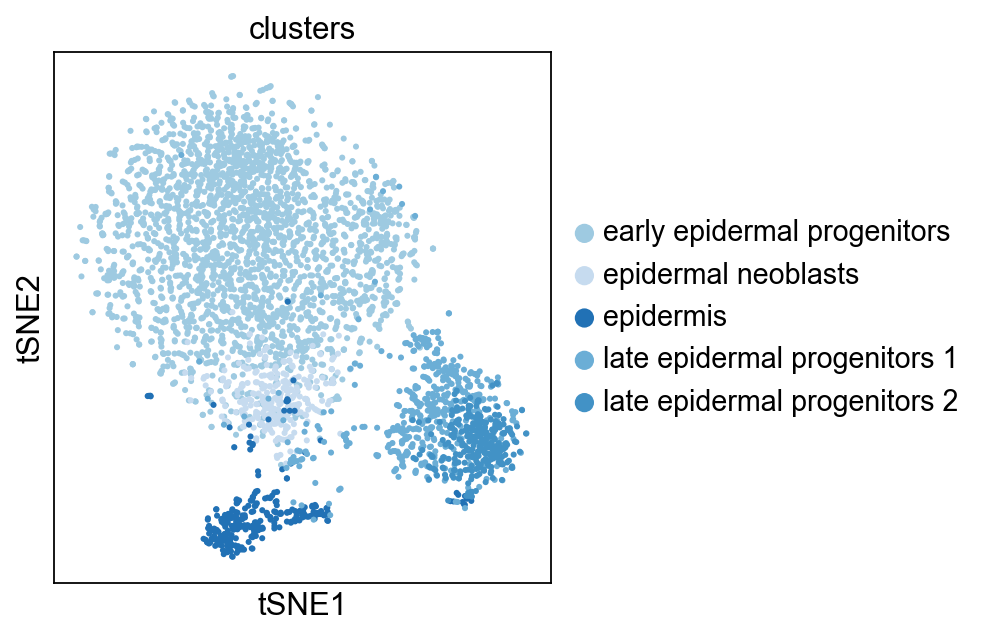

In [16]:
sc.pl.tsne(adata_epidermal, color='clusters')

In [17]:
sc.pp.neighbors(adata_epidermal, n_neighbors=5, n_pcs=0)

computing neighbors
    finished (0:00:03.01)


In [18]:
sc.tl.paga(adata_epidermal, groups='clusters')

running partition-based graph abstraction (PAGA)
    initialized `.distances` `.connectivities` 
    finished (0:00:00.04)


Both tSNE and abstracted graph look slightly different because of the changed final DGE matrix, but represent essentially the same results.

saving figure to file ./figures/paga_compare_epidermal.png


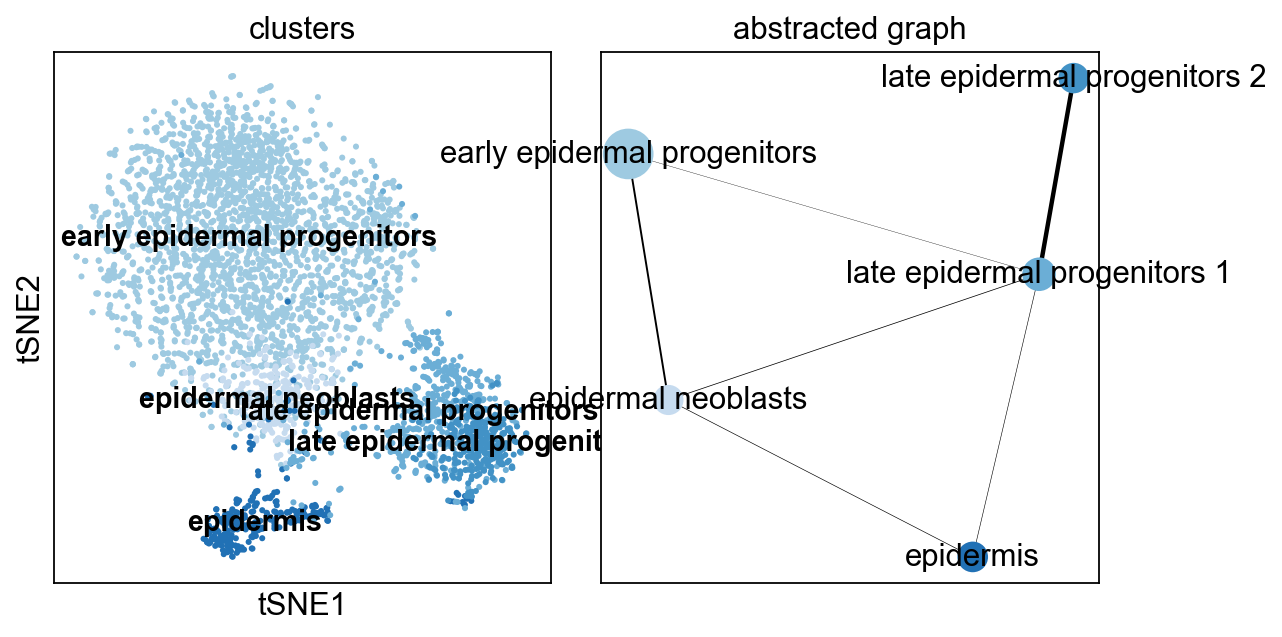

In [19]:
sc.pl.paga_compare(adata_epidermal, threshold_solid=0.02, save='_epidermal')

In [20]:
adata_epidermal.obs['clusters'].cat.categories.values

array(['early epidermal progenitors', 'epidermal neoblasts', 'epidermis',
       'late epidermal progenitors 1', 'late epidermal progenitors 2'],
      dtype=object)

In [21]:
adata_epidermal.uns['paga']['confidence'].toarray()

array([[0.        , 0.11606296, 0.00638533, 0.02084175, 0.        ],
       [0.11606296, 0.        , 0.03896512, 0.04403117, 0.        ],
       [0.00638533, 0.03896512, 0.        , 0.03471209, 0.01359337],
       [0.02084175, 0.04403117, 0.03471209, 0.        , 0.26586406],
       [0.        , 0.        , 0.01359337, 0.26586406, 0.        ]])

In [22]:
adata_epidermal.uns['paga']['connectivities'].toarray()

array([[  0., 510.,  29., 115.,   0.],
       [510.,   0.,  59.,  81.,   0.],
       [ 29.,  59.,   0.,  66.,  21.],
       [115.,  81.,  66.,   0., 499.],
       [  0.,   0.,  21., 499.,   0.]])